<a href="https://colab.research.google.com/github/hida0/ESAA-2022-2/blob/HW/Week05_HW2_Ch_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 교재 필사
핸즈온 9장 비지도학습 p. 299-345
- 몇 가지 비지도 학습과 알고리즘을 학습한다.

### 9-1. 군집
- **비슷한 샘플을 구별**하여 하나의 클러스터(cluster) 또는 비슷한 샘플의 그룹으로 할당하는 것이다.
- 분류와 마찬가지로 각 샘플은 하나의 그룹에 할당된다.
- 군집은 비지도 학습이므로 레이블이 없어서 분류 알고리즘을 사용할 수 없는 데이터에 적용한다.
- 군집은 다음과 같은 다양한 애플리케이션에서 사용된다.
 - **고객 분류**: 고객을 구매 이력이나 웹사이트 내 행동 등을 기반으로 클러스터로 모은다. 동일한 클러스터 내의 사용자가 좋아하는 컨텐츠를 추천하는 추천 시스템을 만들 수 있다.
 - **데이터 분석**: 새로운 데이터셋을 분석할 때 군집 알고리즘을 실행하고 각 클러스터를 따로 분석하면 도움이 된다.
 - **차원 축소 기법**: 한 데이터셋에 군집 알고리즘을 적용하면 각 클러스터에 대한 샘플의 친화성을 측정할 수 있다. 친화성은 샘플이 클러스터에 얼마나 잘 맞는지를 측정한다.
 - **이상치 탐지**: 모든 클러스터에 친화성이 낮은 샘플은 이상치일 가능성이 높다. 이상치 탐지는 특히 제조 분야에서 결함을 감지할 때 유용하며, 부정 거래 감지에 활용된다.
 - **준지도 학습**: 레이블된 샘플이 적다면 군집을 수행하고 동일한 클러스터에 있는 모든 샘플에 레이블을 전파할 수 있다. 이 기법은 지도 학습 알고리즘에 필요한 레이블이 크게 증가하여 성능을 크게 향상시킨다.
 - **검색 엔진**: 일부 검색 엔진은 제시된 이미지와 비슷한 이미지를 찾아준다. 이런 시스템을 구축하려면 먼저 데이터베이스에 있는 모든 이미지에 군집 알고리즘을 적용해야 한다. 비슷한 이미지는 동일한 클러스터에 속하며, 사용자가 찾으려는 이미지를 제공하면 훈련된 군집 모델을 사용해 이미지의 클러스터를 찾고 이 클러스터에 모든 이미지를 반환한다.
 - **이미지 분할**: 색을 기반으로 픽셀을 클러스터로 모으고, 각 픽셀의 색을 해당 클러스터의 평균 색으로 바꾼다. 이렇게 하면 물체의 윤곽을 감지하기 쉬워져 물체 탐지 및 추적 시스템에서 이미지 분할을 많이 활용한다.
- 클러스터에 대한 보편적인 정의는 없다. 알고리즘이 다르면 다른 종류의 클러스터를 감지한다.
- 어떤 알고리즘은 센트로이드라고 부르는 특정 포인트를 중심으로 모인 샘플을 찾고, 어떤 알고리즘은 샘플이 밀집되어 연속된 영역을 찾고, 어떤 알고리즘은 계층적으로 클러스터의 클러스터를 찾는다.
- 먼저 유명한 군집 알고리즘인 **K-평균**과 **DBSCAN**을 살펴보고, 비선형 차원 축소, 준지도 학습, 이상치 탐지와 같은 애플리케이션을 알아본다.

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.datasets import make_blobs
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std, random_state=7)

### 1-1. K-평균
- K-평균은 여러 개의 샘플 덩어리가 잘 보일 때, 반복 몇번으로 이런 종류의 데이터셋을 빠르고 효율적으로 클러스터로 묶을 수 있는 간단한 알고리즘이다.
- K-평균은 **`sklearn.cluster`**로부터 **`KMeans`**를 임포트하여 사용한다.
- 알고리즘에는 찾을 클러스터 개수 k를 지정해야 하며, 각 샘플은 k개의 클러스터 중 하나에 할당된다.
- 군집에서 각 샘플의 레이블은 알고리즘이 샘플에 할당한 클러스터의 인덱스이다. **`KMeans`**의 **`labels_`**는 훈련된 샘플의 군집의 레이블을 가지고 있다.
- **`cluster_centers_`**를 이용하여 알고리즘이 찾은 **각 군집의 센트로이드**도 확인할 수 있다. `predict`로 새로운 샘플에 가장 가까운 센트로이드의 클러스터를 할당할 수 있다.
- 샘플은 대부분 적절한 클러스터에 잘 할당된다. 
- 그러나 K-평균 알고리즘은 클러스터의 크기가 많이 다르면 잘 작동하지 않는다. 샘플을 클러스터에 할당할 때 센트로이드까지의 거리를 고려하는 것이 전부이기 때문이다.

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
y_pred = kmeans.fit_predict(X)
y_pred

array([1, 3, 0, ..., 4, 0, 3], dtype=int32)

In [ ]:
y_pred is kmeans.labels_

True

In [ ]:
kmeans.cluster_centers_

array([[ 0.20876306,  2.25551336],
       [-2.80037642,  1.30082566],
       [-1.46679593,  2.28585348],
       [-2.80389616,  1.80117999],
       [-2.79290307,  2.79641063]])

In [ ]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([0, 0, 4, 4], dtype=int32)

### 1-1. K-평균
- **하드 군집**은 샘플을 하나의 클러스터에 할당하는 것이다.
- **소프트 군집**은 **클러스터마다 샘플에 점수를 부여하는 것**이며, 더 유용할 수 있다. 
- 이 점수는 샘플과 센트로이드 사이의 거리가 될 수 있으며, 반대로 가우시안 방사기저 함수와 같은 유사도 점수가 될 수 있다.
- **`transform( )`**은 샘플과 각 센트로이드 사이의 거리를 반환한다.
- 고차원 데이터셋을 이런 방식으로 변환하면 K-차원 데이터셋이 만들어진다. 이 변환은 매우 효율적인 비선형 차원 축소 기법이 될 수 있다.

In [ ]:
kmeans.transform(X_new)

array([[0.32995317, 2.88633901, 1.49439034, 2.81093633, 2.9042344 ],
       [2.80290755, 5.84236351, 4.4759332 , 5.80730058, 5.84739223],
       [3.29399768, 1.71086031, 1.69136631, 1.21475352, 0.29040966],
       [3.21806371, 1.21567622, 1.54808703, 0.72581411, 0.36159148]])

### 1-1. K-평균
#### 1) K-평균 알고리즘
- K-평균 알고리즘의 작동 원리는 다음과 같다. 
- 센트로이드가 주어진다면 데이터셋에 있는 모든 샘플에 가장 가까운 센트로이드의 클러스터를 할당할 수 있다. 또는 모든 샘플의 레이블이 주어진다면 각 클러스터에 속한 샘플의 평균을 계산하여 모든 센트로이드를 쉽게 구할 수 있다. 
- 그러나 센트로이드나 레이블이 주어지지 않는다면, **처음에는 센트로이드를 랜덤하게 선정**한다. 그 다음에 샘플에 레이블을 할당하고 센트로이드를 업데이트하고, 샘플에 레이블을 할당하고 센트로이드를 업데이트하는 식으로 **센트로이드에 변화가 없을 때**까지 계속한다.
- 이 알고리즘은 제한된 횟수 안에 수렴하는 것을 보장한다. 그러나 적절한 솔루션으로 수렴하지 못할 수 있다. 이 여부는 센트로이드 초기화에 달려 있다.
- 센트로이드 초기화를 개선하여 이런 위험을 줄일 수 있는 방법이 있다.
- 센트로이드 위치를 알 수 있다면 `KMeans`의 **init** 매개변수에 센트로이드 리스트를 담은 넘파이 배열을 지정하고, **n_init**를 1로 설정한다.

In [ ]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1)

### 1-1. K-평균
#### 1) K-평균 알고리즘
- 또 다른 방법은 랜덤 초기화를 다르게 하여 여러번 알고리즘을 실행하고 가장 좋은 솔루션을 선택하는 것이다.
- **랜덤 초기화 횟수**는 **n_init** 매개변수로 조절하며, 기본값은 10이다. 이는 `fit( )` 메서드를 호출할 때 앞서 설명한 전체 알고리즘이 10번 실행된다는 뜻이다.
- 사이킷런은 이 중에 최선을 솔루션을 반환한다. 이때 사용하는 성능 지표는 **각 샘플과 가장 가까운 센트로이드 사이의 평균 제곱 거리**이며 **모델의 이너셔**(inertia)라고 한다.
- `KMeans` 클래스는 알고리즘을 n_init번 실행하여 **이너셔가 가장 낮은 모델을 반환**한다. 이 값이 궁금하면 **`inertia_`**로 모델의 이너셔를 확인할 수 있다.
- **`score( )`** 메서드는 **이너셔의 음수값을 반환**한다. 예측기의 score( ) 메서드는 사이킷런의 큰 값이 좋은 것이라는 규칙을 따라야하기 때문에, 이너셔 값이 가장 작아서 좋은 모델은 (-)가 붙어서 제일 작은 값의 score 값을 반환해야 한다.
--- 
- K-평균 알고리즘을 향상시킨 K-평균++ 알고리즘이 개발되었는데, 이 방법은 K-평균 알고리즘이 최적이 아닌 솔루션으로 수렴할 가능성을 크게 낮춘다.
- 최적의 솔루션을 찾기 위해 실행할 알고리즘 반복 횟수를 크게 줄일 수 있기 때문에, 이 똑똑한 초기화 단계에 드는 추가 계산이 충분한 가치가 있다는 것을 보였다.
- K-평균++ 초기화 알고리즘은 다음과 같다.
 - 데이터셋에서 무작위로 균등하게 하나의 센트로이드 $c^{(1)}$를 선택한다.
 - $D(𝐱^{(i)})^2/\displaystyle\sum_{j=1}^{m}D(𝐱^{(j)})^2$의 확률로 샘플 $𝐱^{(i)}$를 새로운 센트로이드 $c^{(i)}$로 선택한다. 이때 $D(𝐱^{(i)})$는 샘플 $𝐱^{(i)}$와 이미 선택된 가장 가까운 센트로이드 사이까지의 거리를 의미한다. 이 확률 분포는 이미 선택한 센트로이드에서 멀리 떨어진 샘플을 다음 센트로이드로 선택할 가능성을 높인다.
 - k개의 센트로이드가 선택될 때까지 이전 단계를 반복한다.
- `KMeans` 클래스는 기본적으로 이 초기화 방법을 사용한다.

### 1-1. K-평균
#### 2) K-평균 속도 개선과 미니배치 K-평균
- 찰스 엘칸은 삼각 부등식을 사용하여 불필요한 거리 계산을 많이 피함으로써 알고리즘의 속도를 상당히 높일 수 있었다. 
- 또한 데이비드 스컬리는 전체 데이터셋을 사용하여 반복하지 않고 각 반복마다 미니배치를 사용하여 센트로이드를 조금씩 이동시키는 방법으로 알고리즘의 속도를 3배에서 4배 정도 높였다.
- 사이킷런은 **`MiniBatchKMeans`** 클래스에 이 알고리즘을 구현했으며, KMeans 클래스처럼 사용할 수 있다.
---
- 미니배치 K-평균 알고리즘이 일반 K-평균 알고리즘보다 훨씬 빠르지만, 일반적으로 이너셔는 조금 더 나쁜데 특히 클러스터의 개수가 증가할 때 그렇다.
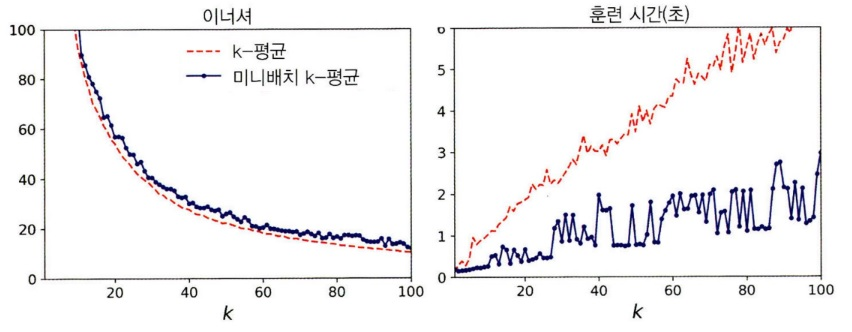
- 왼쪽 그림은 여러 가지 클러스터 개수를 사용했을때 두 알고리즘의 이너셔를 비교한 것이다. 두 곡선의 차이는 일정하게 유지되지만 k가 증가함에 따라 이너셔가 점점 줄어들기 때문에 이 차이가 차지하는 비율은 점점 커진다.
- 오른쪽 그림에서 미니배치 K-평균이 일반 K-평균보다 훨씬 빠르고 k가 증가함에 따라 속도의 차이가 더 커지는 것을 볼 수 있다.

In [ ]:
from sklearn.cluster import MiniBatchKMeans
minibatch_kmeans = MiniBatchKMeans(n_clusters=5)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5)

### 1-1. K-평균
#### 3) 최적의 클러스터 개수 찾기
- 일반적으로 클러스터 개수 k를 어떻게 설정할지 쉽게 알 수 없으며, 만약 올바르게 지정하지 않으면 결과는 매우 나쁠 수 있다.
- 최적의 클러스터 개수를 결정하는 가장 정확한 방법은 **실루엣 점수**(silhouette score)이다. 이 값은 모든 샘플에 대한 **실루엣 계수**(silhouette coefficient)**의 평균**이다.
- 샘플의 실루엣 계수는 $(b-a)/\max(a,b)$로 계산한다. $a$는 동일한 클러스터에 있는 다른 샘플까지의 평균 거리, 즉 클러스터 내부의 평균 거리이다. $b$는 가장 가까운 클러스터까지의 평균 거리이다.
- 실루엣 계수는 **-1에서 +1**까지의 값을 갖는다. **+1에 가까우면 자신의 클러스터 안에 잘 속해 있고** 다른 클러스터와는 멀리 떨어져 있다는 의미이다. **0에 가까우면 클러스터 경계**에 위치한다는 뜻이며, **-1에 가까우면 이 샘플이 잘못된 클러스터에 할당**되었다는 의미이다.
- 실루엣 점수를 계산하려면 사이킷런의 **`silhouette_score( )`**를 사용한다. 데이터셋의 모든 샘플과 군집 모델에 의해 할당된 레이블을 전달한다.
---
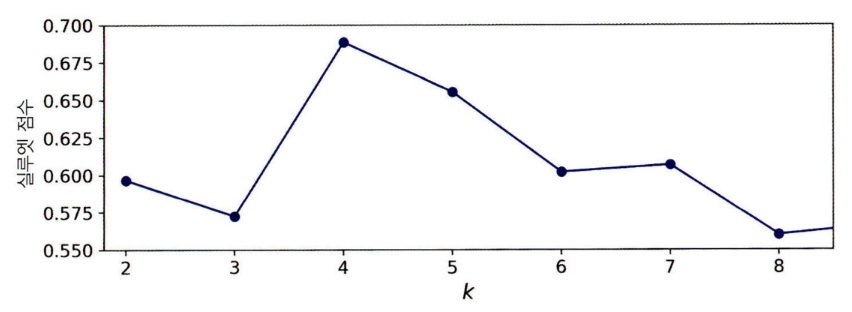
- 클러스터 개수를 달리하여 실루엣 점수를 나타낸 그래프는 다음과 같다.
- 이 그래프에서 k=4가 좋은 선택이지만 k=5도 꽤 좋다는 사실을 발견할 수 있다.

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.655517642572828

### 1-1. K-평균
#### 3) 최적의 클러스터 개수 찾기
- **모든 샘플의 실루엣 계수를 할당된 클러스터와 계수값으로 정렬**하여 그리면 더 많은 정보가 있는 그래프를 얻을 수 있다.
- 이를 **실루엣 다이어그램**이라고 하며, 다음과 같다.
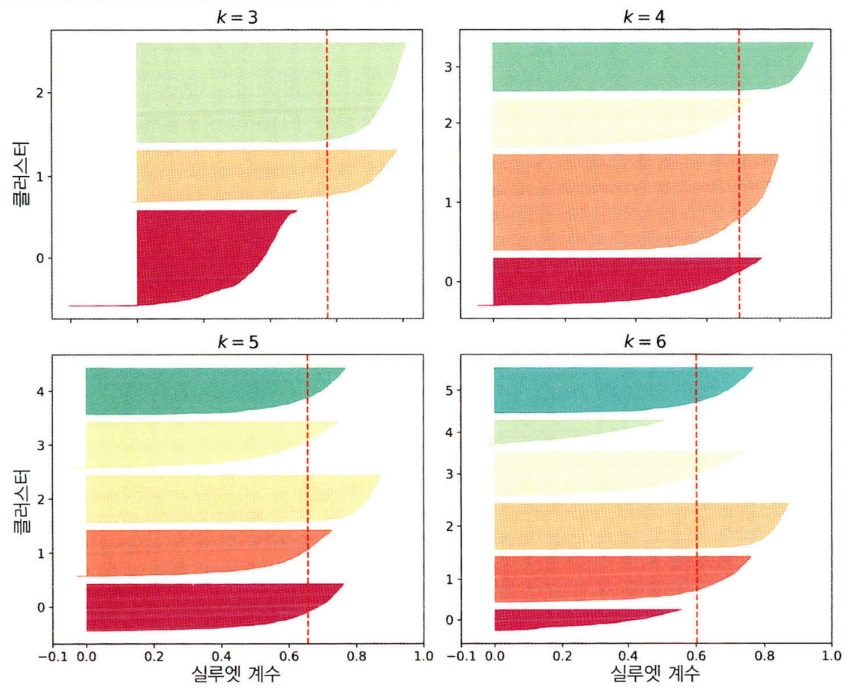
- 클러스터마다 칼 모양의 그래프가 그려진다. 이 그래프의 **높이**는 **클러스터가 포함하고 있는 샘플의 개수**를 의미한다. 
- **너비**는 이 **클래스에 포함된 샘플의 정렬된 실루엣 계수**를 나타내며, 넓을수록 좋다.
- 수직 파선은 각 클러스터 개수에 해당하는 실루엣 점수를 나타낸다. 한 클러스터의 샘플 대부분이 이 점수보다 낮은 계수를 가지면, 즉 많은 샘플이 파선의 왼쪽에서 멈추면 클러스터의 샘플이 다른 클러스터랑 너무 가깝다는 것을 의미하므로 나쁜 클러스터이다.
- k=4 또는 k=5일 때는 클러스터가 좋아보인다. 
- k=4일 때는 위에서 3번째의 클러스터가 매우 큰 반면, k=5일 때는 모든 클러스터의 크기가 비슷하다.
- 따라서 k=4일 때 전반적인 실루엣 점수가 k=5보다 조금 높더라도 비슷한 크기의 클러스터를 얻을 수 있는 k=5를 선택하는 것이 좋다.

### 1-2. K-평균의 한계
- K-평균은 속도가 빠르고 확장이 용이하다는 장점이 있다.
- 그러나 앞에서 보았듯이 최적이 아닌 솔루션을 피하려면 알고리즘을 여러 번 실행해야 하며, 클러스터 개수를 지정해야 한다는 단점이 있다.
- 또한 K-평균은 클러스터의 크기나 밀집도가 서로 다르거나 원형이 아닐 경우 잘 작동하지 않는다.

### 1-3. 군집을 사용한 이미지 분할
- **이미지 분할**은 **이미지를 세그먼트**(segment) **여러 개로 분할**하는 작업이다.
- **시맨틱 분할**은 **동일한 종류**의 물체에 속한 모든 픽셀을 같은 세그먼트에 할당한다. 
- **색상 분할**은 **동일한 색상**을 가진 픽셀을 같은 세그먼트에 할당하는 것으로, 시맨틱 분할보다 훨씬 쉬운 작업이다.
---
- **`matplotlib.image`**의 **`imread( )`** 함수를 이용하여 이미지를 읽는다.
- 이미지는 3D 배열로 표현된다. 첫번째 차원의 크기가 높이, 두번째 차원의 크기는 너비, 세번째 차원의 크기는 컬러 채널 개수이다. 다른 말로 하면 각 픽셀에 대해 빨강, 초록, 파랑의 강도를 담은 3D 벡터가 있다.
- 어떤 이미지는 더 적은 채널을 가진다. 예를 들어 흑백 이미지는 채널이 하나이다.
- 다음 코드는 3D 배열을 RGB 색상의 긴 리스트로 변환한 다음, K-평균을 사용하여 이 색상을 클러스터로 모은다. 예를 들어 모든 초록색을 하나의 컬러 클러스터로 만드는 것이다.

In [ ]:
import os
from matplotlib.image import imread
image = imread(os.path.join("images", "unsupervised_learning", "ladybug.png"))
image.shape
# (533, 800, 3)

In [ ]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

### 1-4. 군집을 사용한 전처리
- 군집은 차원 축소에 효과적인 방법으로, 특히 지도 학습 알고리즘을 적용하기 전에 전처리 단계에서 사용할 수 있다.
- 차원 축소에 군집을 사용하는 예를 위해 사이킷런의 `datasets`으로부터 `load_digits`을 임포트하여 숫자 데이터셋을 다루어본다.
- 이 데이터셋은 MNIST와 비슷한 데이터셋으로, 0에서 9까지 숫자를 나타내는 8x8 크기 흑백 이미지 1797개를 담고 있다.
- 이 데이터를 훈련 세트와 테스트 세트로 나눈 다음 **로지스틱 회귀 모델**을 훈련시킨다.
- `score` 메서드로 테스트 세트에서의 정확도를 평가해보면 좋은 정확도를 얻을 수 있다.

In [ ]:
from sklearn.datasets import load_digits
X_digits, y_digits = load_digits(return_X_y=True)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
log_reg.score(X_test, y_test)

0.9644444444444444

### 1-4. 군집을 사용한 전처리
- 이제 K-평균을 전처리 단계로 사용하여 정확도가 더 좋아지는지 확인한다.
- `Pipeline`을 이용하여 파이프라인을 만들어 먼저 훈련 세트를 50개의 클러스터로 모으고, 그 다음 이미지를 50개 클러스터까지 거리로 바꾼다.
- 그 다음 로지스틱 회귀 모델을 훈련시킨다.
- 이 분류 파이프라인을 `score`를 이용하여 다시 평가하면 정확도가 더 올라간 것을 확인할 수 있다.

In [ ]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50)),
    ("log_reg", LogisticRegression()),
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50)),
                ('log_reg', LogisticRegression())])

In [ ]:
pipeline.score(X_test, y_test)

0.9733333333333334

### 1-4. 군집을 사용한 전처리
- 클러스터 개수 k를 임의로 정했으나 더 좋은 개수를 찾을 수 있다.
- K-평균이 분류 파이프라인의 하나의 전처리 단계이기 때문에 이전보다 좋은 k값을 찾는 일이 더 쉽다. 가잫 좋은 k값은 교차 검증에서 가장 좋은 분류 성능을 내는 값이다.
- **`GridSearchCV`**를 이용하여 최적의 클러스터 개수를 찾아본다.
- k=87 개의 클러스터를 사용할 때 정확도가 크게 향상된다.
- `score`를 사용하여 테스트 세트에서의 정확도를 측정하면 95.56%를 달성한다.

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = dict(kmeans__n_clusters=range(2, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

In [ ]:
grid_clf.best_params_

{'kmeans__n_clusters': 83}

In [ ]:
grid_clf.score(X_test, y_test)

0.9688888888888889

### 1-5. 군집을 사용한 준지도 학습
- 군집을 사용하는 또 다른 예는 준지도 학습이다. **레이블이 없는 데이터가 많고**, **레이블이 있는 데이터는 적을 때** 사용한다.
- 숫자 데이터셋에서 레이블된 50개 샘플에 로지스틱 회귀 모델을 훈련한다.
- 테스트 세트에서 이 모델의 성능을 측정하면 정확도가 66.89%이다. 당연히 전체 데이터셋을 사용했을 때보다 정확도가 낮다.
---
- 이를 개선하기 위해 먼저 훈련 세트를 50개의 클러스터로 모은다. 그 다음 각 클러스터에서 센트로이드에 가장 가까운 이미지를 찾는다.
- 이런 이미지를 **대표 이미지**라고 한다. 다음 그림이 대표 이미지 50개이다.
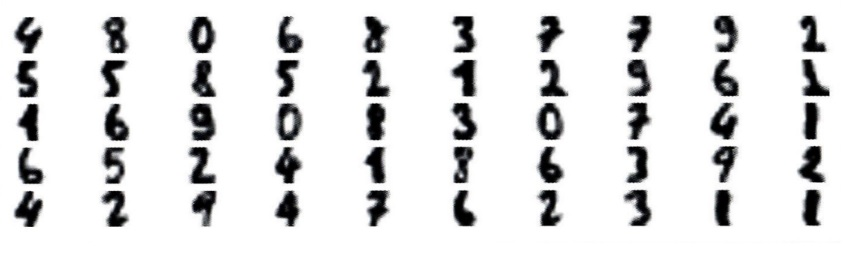

In [ ]:
n_labeled = 50
log_reg = LogisticRegression()
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

LogisticRegression()

In [ ]:
log_reg.score(X_test, y_test)

0.84

In [ ]:
k = 50
kmeans = KMeans(n_clusters=k)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

### 1-5. 군집을 사용한 준지도 학습
- 이미지를 보고 수동으로 레이블을 할당한다.
- 샘플에 레이블을 부여하는 것은 비용이 많이 들고 어렵다. 따라서 무작위 샘플 대신 대표 샘플에 레이블을 할당하는 것이 좋은 방법이다.


In [ ]:
y_representative_digits = np.array([
     1,3,9,6,8,4,0,8,9,2,
     7,8,2,3,5,2,5,7,6,1,
     4,3,3,2,5,7,0,1,7,7,
     4,1,1,1,4,8,4,9,6,0,
     4,2,9,8,2,9,5,9,8,9
 ])

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.08

### 1-5. 군집을 사용한 준지도 학습
- **레이블을 동일한 클러스터에 있는 모든 샘플로 전파**하는 것을 **레이블 전파**라고 한다. 다음 코드는 레이블 전파를 수행하는 코드이다.
- 그러나 극단적이 성능 향상은 일어나지 않는데, 문제는 각 대표 샘플의 레이블을 동일한 클러스터의 **모든 샘플에 전파**한 것이다. 여기에는 **클러스터 경계에 가깝게 위치한 샘플이 포**함되어 있고, 아마 레이블이 잘못 부여되었을 것이다.
---
- 이번에는 센트로이드와 가까운 샘플의 20%에만 레이블을 전파해보고 어떻게 되는지 확인한다.
- 부분적으로 전파한 이 데이터셋에 모델을 다시 훈련시킨다.

In [ ]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.08

In [ ]:
percentile_closest = 20
X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_==i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.08

### 1-6. DBSCAN
- DBSCAN은 **국부적인 밀집도를 추정**하는 매우 다른 방식을 사용하며, 이 방식으로 임의의 모양을 가진 클러스터를 식별할 수 있다.
- 이 알고리즘은 **밀집된 연속적 지역을 클러스터로 정의**하며, 작동 방식은 다음과 같다.
 - 알고리즘이 각 샘플에서 작은 거리인 **$ɛ$(입실론) 내에 샘플이 몇 개 놓여있는지** 센다. 이 지역을 **샘플의 $ɛ$-이웃**이라고 한다.
 - 자기 자신을 포함하여 **$ɛ$-이웃 내에 적어도 min_samples개 샘플이 있다**면 이를 **핵심 샘플로 간주**한다. 즉 핵심 샘플은 밀집된 지역에 있는 샘플이다.
 -** 핵심 샘플의 이웃에 있는 모든 샘플**은 **동일한 클러스터**에 속한다. 이웃에는 다른 핵심 샘플이 포함될 수 있다. 따라서 핵심 샘플의 이웃의 이웃은 계속해서 하나의 클러스터를 형성한다.
 - 핵심 샘플이 아니고 이웃도 아닌 샘플은 **이상치로 판단**한다.
- 이 알고리즘은 모든 클러스터가 충분히 밀집되어 있고 밀집되지 않은 지역과 잘 구분될 때 좋은 성능을 낸다.

### 1-6. DBSCAN
- 사이킷런의 **`DBSCAN`** 클래스는 사용법이 간단하다. 반달 모양 데이터셋에서 테스트한다.
- 모든 샘플의 레이블은 **labels_**에 저장되어 있다. 일부 샘플의 클러스터 인덱스는 **-1**이다. 이는 알고리즘이 **이 샘플을 이상치로 판단했다**는 의미이다.
- 핵심 샘플의 인덱스는 **core_sample_indices_**에서 확인할 수 있다. 
- 핵심 샘플 자체는 **components_**에 저장되어 있다.
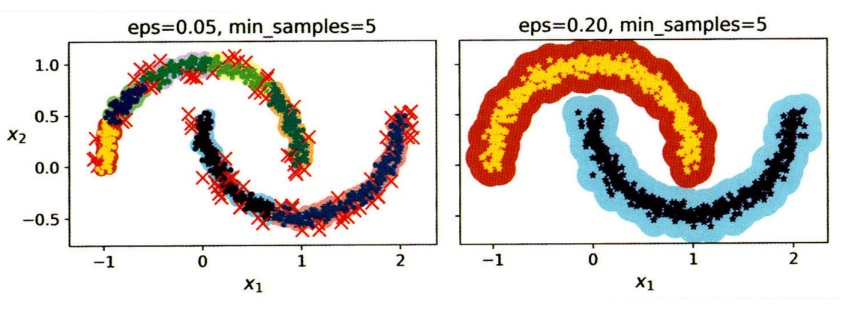
- 이 군집 결과는 다음 그림의 왼쪽 그래프이다. 그림에서 보듯이 클러스터를 7개 만들었고 많은 샘플을 이상치로 판단했다.
- **eps**를 0.2로 증가시켜 샘플의 이웃 범위를 넓히면 오른쪽 그래프처럼 완벽한 군집을 얻을 수 있다.

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
X, y =make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [ ]:
dbscan.labels_

array([ 0,  1,  2,  0,  5,  1,  0,  2,  0, -1,  1,  1,  3,  1,  0,  4,  3,
        1,  0,  1,  1,  2,  0, -1,  0,  0,  0,  0,  1,  1,  3,  3,  1,  0,
        3,  2,  3,  1,  1, -1,  1,  4,  3,  2,  0,  0,  5,  0,  1, -1,  0,
        0,  0,  5,  3,  1,  0,  1,  1,  2,  3,  0,  3,  3,  0, -1, -1,  0,
        1,  0,  1,  0,  3,  4,  0,  3,  2,  3,  0,  1,  2,  4, -1,  0,  0,
        1,  1,  3,  1,  3,  3,  0,  1,  1,  1,  1,  3,  2,  1,  0, -1,  0,
        0,  0,  3,  0,  2,  0,  1,  0,  2,  8,  3,  3,  1,  0,  2,  0,  3,
        2,  0,  2,  0,  6,  5,  1,  1,  3,  1,  5,  3, -1,  3,  1,  1, -1,
        0,  0,  3,  7,  1,  0,  1,  2,  0,  8,  3,  1,  4,  0,  1,  4,  2,
        3,  3,  0,  3,  1,  6,  0,  2,  1,  0,  3,  4,  2,  3,  0,  3,  0,
        0,  0,  0,  0,  0,  6,  0,  0,  4,  1,  0,  1,  1,  1,  6,  0,  2,
        6,  6,  0,  0,  3,  0,  2,  1,  1,  3,  3, -1,  0,  0,  1,  0,  6,
        1,  2,  1,  1,  1,  1,  3,  1, -1,  1,  6,  3,  3,  2,  6,  0, -1,
        4,  8,  3,  1,  2

In [ ]:
print(len(dbscan.core_sample_indices_))

817


In [ ]:
dbscan.core_sample_indices_

array([  0,   1,   2,   3,   5,   6,   7,   8,  10,  12,  14,  15,  16,
        17,  18,  19,  20,  21,  22,  24,  25,  26,  27,  28,  29,  30,
        31,  32,  33,  34,  35,  36,  37,  38,  40,  41,  42,  43,  44,
        46,  47,  48,  50,  51,  52,  53,  54,  55,  56,  58,  59,  60,
        61,  62,  63,  64,  67,  68,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  96,  97,  98, 101, 102, 103, 104, 105, 106, 107,
       108, 110, 112, 113, 114, 115, 116, 118, 119, 120, 121, 122, 123,
       124, 125, 126, 127, 130, 132, 133, 134, 136, 137, 139, 141, 143,
       144, 145, 146, 147, 148, 149, 150, 152, 155, 156, 157, 158, 159,
       161, 162, 164, 165, 166, 168, 169, 170, 171, 172, 173, 174, 175,
       177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189,
       190, 191, 192, 193, 194, 195, 196, 197, 199, 201, 202, 203, 204,
       205, 206, 207, 208, 209, 210, 211, 213, 214, 215, 216, 21

In [ ]:
dbscan.components_

array([[ 0.51179513, -0.37937716],
       [ 0.94101272, -0.02003767],
       [-0.9973955 ,  0.21652388],
       ...,
       [ 0.82147737,  0.66934123],
       [ 1.78884203, -0.02435943],
       [ 2.00676656,  0.49273879]])

### 1-6. DBSCAN
- **DBSCAN**은 `predict( )` 메서드를 제공하지 않고, `fit_predict( )` 메서드를 제공한다. 다시 말해 새로운 샘플에 대해 클러스터를 예측할 수 없다.
- 이런 구현 결정은 다른 분류 알고리즘이 이런 작업을 더 잘 수행할 수 있기 때문이다. 따라서 사용자가 필요한 예측기를 선택해야 한다.
- 예를 들어 **`KNeighborsClassifier`**를 훈련시킨다.
- 샘플 몇개를 전달하여 어떤 클러스터에 속할 확률이 높은지 예측하고, 각 클러스터에 대한 확률을 추정한다.
- 훈련 세트에 이상치가 없기 때문에 클러스터가 멀리 떨어져 있더라도 분류기는 항상 클러스터 한 개를 선택한다.
- 최대 거리를 사용하면 두 클러스터에서 멀리 떨어진 샘플을 이상치로 간단하게 분류할 수 있다.
- `KNeighborsClassifier`클래스의 **`kneighbors( )`** 메서드에 샘플을 전달하면 훈련 세트에서 가장 가까운 k개 이웃의 거리와 인덱스를 반환한다. 즉 k개의 열을 가진 행렬 2개를 반환한다.
---
- 간단히 말해 DBSCAN은 매우 간단하지만 강력한 알고리즘이다. 
- 클러스터의 모양과 개수에 상관없이 감지할 수 있는 능력이 있다. 또 이상치에 안정적이고 하이퍼파라미터가 eps와 min_samples 2개뿐이다.
- 그러나 클러스터 간의 밀집도가 크게 다르면 모든 클러스터를 올바르게 잡아내는 것이 불가능하다. 계산 복잡도는 대략 $O(mlogm)$이다. 샘플 개수에 대해 거의 선형적으로 증가한다.
- 사이킷런의 구현은 eps가 커지면 $O(m^2)$만큼 메모리가 필요하다.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [ ]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)
knn.predict_proba(X_new)

array([[0.16, 0.  , 0.38, 0.  , 0.  , 0.46, 0.  , 0.  , 0.  ],
       [0.94, 0.06, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.2 , 0.8 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.82, 0.  , 0.  , 0.  , 0.  , 0.18]])

In [ ]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  0,  1, -1])

### 1-7. 다른 군집 알고리즘
#### 1) 병합 군집
- 이 알고리즘은 클러스터 계층을 밑바닥부터 위로 쌓아 구성한다. 처음에는 샘플 하나에서 시작하여 반복마다 **인접한 클러스터 쌍을 연결**한다. 
- 병합된 클러스터 쌍을 트리로 모두 그리면 클러스터의 이진 트리를 얻을 수 있다. 이 트리의 리프는 개별 샘플이다.
- 병합 군집은 대규모 샘플과 클러스터에 잘 확장되며 다양한 형태의 클러스터를 감지할 수 있다. 특정 클러스터 개수를 선택하는데 도움이 되는 유용한 클러스터 트리를 만들 수 있다. 이는 어떤 짝 거리와도 사용할 수 있다.
- 이웃한 샘플 간의 거리를 담은 $m$x$m$ 크기 희소 행렬을 연결 행렬로 전달하는 식으로 대규모 샘플에도 잘 적용할 수 있다. 연결 행렬이 없으면 대규모 데이터셋으로 확장하기 어렵다.


### 1-7. 다른 군집 알고리즘
#### 2) BIRCH
- 특별히 대규모 데이터셋을 위해 고안된 알고리즘이다.
- 특성 개수가 너무 많지 않다면(20개 이하) 배치 K-평균보다 빠르고 비슷한 결과를 만든다.
- 훈련 과정에서 새로운 샘플을 클러스터에 빠르게 할당할 수 있는 정보를 담은 트리 구조를 만든다. 
- 이 트리에 모든 샘플을 저장하지 않는데, 이 방식은 제한된 메모리를 사용해 대용량 데이터셋을 다룰 수 있다.

### 1-7. 다른 군집 알고리즘
#### 3) 평균-이동
- 이 알고리즘은 먼저 각 샘플을 중심으로 하는 원을 그리고, 그 다음 **원마다 안에 포함된 모든 샘플의 평균**을 구한다. 그리고 **원의 중심을 평균점**으로 이동시킨다.
- **모든 원이 움직이지 않을 때**까지 이 평균-이동(mean-shift)을 계속한다.
- 평균-이동은 지역의 최대 밀도를 찾을 때까지 높은 쪽으로 원을 이동시킨다. 동일한 지역에 안착한 **원에 있는 모든 샘플은 동일한 클러스터**가 된다.
- `DBSCAN`과 유사한 특징이 있다. 
 - 모양이나 개수에 상관없이 클러스터를 찾을 수 있다. 
 - 하이퍼파라미터도 매우 적다. 평균-이동은 원 반경을 나타내는 **`bandwidth`** 하나만을 갖는다. 
 - 국부적인 밀집도 추정에 의존한다.
- 하지만 `DBSCAN`과는 달리 평균-이동은 클러스터 내부 밀집도가 불균형할 때 여러 개로 나누는 경향이 있다. 
- 계산 복잡도가 $O(m^2)$이기 때문에, 대규모 데이터셋에는 적합하지 않다.

### 1-7. 다른 군집 알고리즘
#### 4) 유사도 전파
- 이 알고리즘은 **투표 방식**을 사용한다. 샘플은 **자신을 대표**할 수 있는 **비슷한 샘플에 투표**한다.
- 알고리즘이 수렴하면 **각 대표와 투표한 샘플이 클러스터를 형성**한다.
- 유사도 전파는 크기가 다른 여러 개의 클러스터를 감지할 수 있다.
- 계산 복잡도가 $O(m^2)$이기 때문에, 대규모 데이터셋에는 적합하지 않다.

### 1-7. 다른 군집 알고리즘
#### 5) 스펙트럼 군집
- 이 알고리즘은 **샘플 사이의 유사도 행렬**을 받아 **차원을 축소**하는 저차원 임베딩을 만든다.
- 그 다음 이 저차원 공간에서 또 다른 군집 알고리즘을 사용한다. 사이킷런의 구현은 K-평균을 사용한다.
- 스펙트럼 군집은 복잡한 클러스터 구조를 감지하고 그래프 컷을 찾는데 사용할 수 있다.
- 이 알고리즘은 샘플 개수가 많으면 잘 적용되지 않고, 클러스터의 크기가 매우 다르면 잘 작동하지 않는다.

### 9-2. 가우시안 혼합(GMM)
- 가우시안 혼합 모델(Gaussian Mixture Model) **밀집도 추정, 군집, 이상치 탐지**에 사용할 수 있는 모델이다.
- 가우시안 혼합 모델은 **샘플이 파라미터가 알려지지 않은 여러 개의 혼합된 가우시안 분포에서 생성되었다고 가정**하는 확률 모델이다.
- 하나의 가우시안 분포에서 생성된 모든 샘플은 하나의 클러스터를 형성하며, 일반적으로 이 클러스터는 타원형이다. 각 클러스터는 타원의 모양, 크기, 밀집도, 방향이 다르다.
- 샘플이 주어지면 가우시안 분포 중 하나에서 생성되었다는 것을 알 수 있다. 하지만 어떤 분포인지, 또 이 분포의 파라미터는 무엇인지 알지 못한다.
- 여러 GMM 변종이 있으며, 가장 간단한 버전이 사이킷런의 **`GaussianMixture`** 클래스에 구현되어 있다.
- 학습한 모델에 가중치 **`weights_`**, 평균 **`means_`**, 분산 **`covariances_`**를 이용하여 추정한 파라미터를 확인할 수 있다.

In [ ]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10)

In [ ]:
gm.weights_

array([0.20126165, 0.20805785, 0.5906805 ])

In [ ]:
gm.means_

array([[-0.75235114,  0.55693668],
       [ 1.736628  , -0.06347588],
       [ 0.49117694,  0.25845137]])

In [ ]:
gm.covariances_

array([[[ 0.05135618,  0.06181651],
        [ 0.06181651,  0.08890408]],

       [[ 0.0574097 ,  0.06374486],
        [ 0.06374486,  0.08811013]],

       [[ 0.16862294, -0.1012805 ],
        [-0.1012805 ,  0.28719973]]])

### 9-2. 가우시안 혼합(GMM)
- **`GaussianMixture`** 클래스는 **기댓값-최대화(EM) 알고리즘**을 사용한다. 
- 이 알고리즘은 K-평균 알고리즘과 공통점이 많다. 클러스터 파라미터를 랜덤하게 초기화하고 **수렴할 때까지 두 단계를 반복**한다.
- 먼저 **샘플을 클러스터에 할당**하며, 이를 **기댓값 단계**라고 한다. 그 다음 **클러스터를 업데이트**하며, 이를 **최대화 단계**라고 한다.
- K-평균과는 달리 EM 알고리즘은 **soft** 클러스터 할당을 사용한다. 
- 예를 들어 기댓값 단계에서 알고리즘은 **각 클러스터에 속할 확률을 예측**한다. 그 다음 최대화 단계에서 각 클러스터가 데이터셋에 있는 모든 샘플을 사용하여 업데이트된다. 이때 **클러스터에 속할 추정 확률로 샘플에 가중치가 적용**된다. 이 확률을 클러스터의 **책임**이라고 한다.
- 최대화 단계에서 클러스터 업데이트는 책임이 가장 많은 샘플에 크게 영향을 받는다.
---
- **`converged_`**로 알고리즘의 수렴 여부와 **`n_iter_`**로 반복 횟수를 확인할 수 있다.
- 각 클러스터의 위치, 크기, 모양, 상대적인 가중치를 예측한다. 
- 이 모델은 **새로운 샘플을 가장 비슷한 클러스터**에 손쉽게 할당하는 **하드 군집** 또는 **특정 클러스터에 속할 확률을 예측**하는 **소프트 군집**을 사용할 수 있다.
- 하드 군집을 위해서는 **`predict( )`**를 사용하고, 소프트 군집을 위해서는 **`predict_proba( )`**를 사용한다.

In [ ]:
gm.converged_

True

In [ ]:
gm.n_iter_

16

In [ ]:
gm.predict(X)

array([2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 0, 1, 2, 2, 2, 2, 0,
       2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 1, 2, 0, 1, 0,
       2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 1, 2, 2, 2, 2, 0, 1, 2, 2, 1, 2, 1,
       2, 2, 2, 2, 2, 2, 1, 0, 2, 1, 0, 2, 2, 2, 0, 0, 1, 2, 2, 2, 2, 1,
       2, 1, 1, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2,
       0, 1, 1, 1, 2, 2, 0, 2, 1, 0, 2, 0, 2, 0, 0, 2, 2, 1, 2, 0, 1, 0,
       1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 1, 1, 2, 0, 2, 2, 0, 0, 1,
       1, 2, 1, 2, 0, 2, 0, 2, 2, 1, 2, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 1, 1,
       2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 0, 1, 1, 0, 0, 2,
       2, 2, 1, 1, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2, 0, 1, 2, 2, 0, 0, 0, 2,
       2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 1, 0, 1,
       2, 1, 0, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 0, 0, 0,
       2, 1, 2, 2, 0, 2, 1, 1, 2, 0, 2, 2, 2, 2, 2,

In [ ]:
gm.predict_proba(X)

array([[3.23516946e-097, 2.40720049e-019, 1.00000000e+000],
       [1.18481017e-114, 2.76555312e-013, 1.00000000e+000],
       [9.99840229e-001, 1.63971376e-166, 1.59771371e-004],
       ...,
       [6.99952145e-058, 2.19876554e-041, 1.00000000e+000],
       [1.91078364e-226, 9.98137597e-001, 1.86240261e-003],
       [1.96898239e-203, 9.99649131e-001, 3.50869088e-004]])

### 9-2. 가우시안 혼합(GMM)
- 가우시안 혼합 모델은 **생성 모델**이다. 즉 이 모델에서 **새로운 샘플을 생성**할 수 있다. 
- 모델에 **`sample(n)`**를 이용하여 n개의 샘플을 만들 수 있다. 반환된 샘플은 클러스터 인덱스 순으로 정렬되어 있다.
- **`score_samples( )`** 메서드를 이용하여 **주어진 위치에서 모델의 밀도를 추정**할 수 있다. 샘플이 주어지면 이 메서드는 **그 위치의 확률 밀도 함수(PDF)의 로그를 예측**한다. 점수가 높을수록 밀도가 높다.
- 이 점수의 **지숫값**을 계산하면 **샘플의 위치에서 PDF 값**을 얻을 수 있다. 이 값은 하나의 확률이 아닌 확률 밀도이므로, 0에서 1까지의 값이 아니라 어떤 양수값도 될 수 있다.

In [ ]:
X_new, y_new = gm.sample(6)
X_new

array([[-0.81445466,  0.45180645],
       [ 1.83327393,  0.0841598 ],
       [ 1.95389436,  0.25296646],
       [ 0.17740403, -0.37500838],
       [ 0.16705777, -0.23749981],
       [-0.08114212,  0.94552732]])

In [ ]:
y_new

array([0, 1, 1, 2, 2, 2])

In [ ]:
gm.score_samples(X_new)

array([ 0.09229498, -0.07864527, -0.52542286, -2.51561513, -2.09654125,
       -1.96287085])

### 9-2. 가우시안 혼합(GMM)
- 특성이나 클러스터가 많거나, 샘플이 적을 때는 EM이 최적의 솔루션으로 수렴하기 어렵다. 
- 이런 작업의 어려움을 줄이려면 알고리즘이 학습할 파라미터의 개수를 제한해야 한다. 방법 중 하나는 클러스터의 모양과 방향의 범위를 제한하는 것이다.
- 공분산 행렬에 제약을 추가하여 제한할 수 있다. 사이킷런의 **`covariance_type`** 매개변수에 다음 값 중 하나를 설정한다. 기본값은 `full`로, 각 클러스터는 모양, 크기, 방향에 제약이 없다.
 - `spherical`: 모든 클러스터가 원형이다. 그러나 지름은 다를 수 있다. 즉 분산이 다르다.
 - `diag`: 클러스터는 크기에 상관없이 어떤 타원형도 가능하다. 그러나 타원의 축은 좌표 축과 나란해야 한다. 즉 공분산 행렬이 대각 행렬이어야 한다.
 - `tied`: 모든 클러스터가 동일한 타원 모양, 크기, 방향을 가진다. 즉 모든 클러스터는 동일한 공분산 행렬을 공유한다.

### 2-1. 가우시안 혼합을 사용한 이상치 탐지
- 이상치 탐지는 **보통과 많이 다른 샘플을 감지**하는 작업니다. 이를 **이상치**라고 부르고, 보통 샘플은 **정상치**라고 한다.
- 이상치 탐지는 다양한 애플리케이션에서 사용할 수 있다. 예를 들면 부정 거래 감지, 제조 결함이 있는 제품 감지에 사용한다. 또는 다른 모델을 훈련하기 전에 데이터셋에서 이상치를 제거하는데 사용한다.
- 가우시안 혼합 모델을 이상치 탐지에 사용하는 방법은 매우 간단하다. **밀도가 낮은 지역**에 있는 모든 샘플을 **이상치**로 볼 수 있다. 이렇게 하려면 **사용할 밀도 임계값**을 정해야 한다.
- 예를 들어 결함 제품을 감지하려는 제조 회사가 결함 제품의 비율이 4%라는 것을 알고 있다면, 밀도 임계값을 이 값으로 설정하면 밀도가 낮은 지역에 있는 샘플 4%를 얻을 수 있다.
- 만약 거짓 양성이 너무 많다면, 즉 정상인 제품이 결함으로 표시되었다면 임계값을 더 낮춘다. 반대로 거짓 음성이 너무 많다면, 즉 결함 제품이 결함으로 표시되지 않았다면 임계값을 더 높인다. 이는 일반적인 정밀도/재현율 트레이드 오프이다.
- 이와 비슷한 작업은 **특이치 탐지**이다. 이 알고리즘은 이상치로 오염되지 않은 깨끗한 데이터셋에서 훈련한다는 것이 이상치 탐지와 다르다.
- 다음 코드는 4%를 밀도 임계값으로 사용하여 이상치를 구분하는 방법이다.


In [ ]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

In [ ]:
anomalies

array([[-0.3356419 ,  0.79598632],
       [-0.08745047,  1.0820039 ],
       [ 2.03519583,  0.58600398],
       [-1.04570534, -0.01347842],
       [-0.98064546, -0.08037496],
       [-0.15000504,  1.0813624 ],
       [ 1.92989861,  0.46290366],
       [-0.26286932,  0.93720883],
       [ 1.93934569,  0.53761078],
       [-0.99490705,  0.0166949 ],
       [-0.17543271,  0.96718148],
       [-0.13546218,  1.09538835],
       [ 1.97008439,  0.48280133],
       [-0.27252478,  0.91044365],
       [-0.14878013,  1.02155822],
       [ 1.95439075,  0.49633042],
       [-0.21573755,  1.00888129],
       [ 1.20235184, -0.41011567],
       [ 1.99848453,  0.4989062 ],
       [-0.21881356,  0.88615011],
       [-0.23299862,  0.98301918],
       [ 1.21918252, -0.40296265],
       [ 2.00838729,  0.49302003],
       [-0.2477428 ,  0.97830225],
       [-0.17006895,  0.95565439],
       [-0.95188075,  0.0281698 ],
       [-0.17874532,  1.10202243],
       [-0.20065519,  1.06744537],
       [-0.17043033,

### 2-2. 클러스터 개수 선택하기
- K-평균처럼 **`GaussianMixture`** 알고리즘은 클러스터의 개수를 지정해야 한다.
- K-평균에서는 이너셔나 실루엣 점수를 사용하여 적절한 클러스터의 개수를 선택하나, 가우시안 혼합에서는 이런 지표를 사용할 수 없다. 이런 지표들은 클러스터가 타원형이거나 크기가 다를 때는 안정적이지 않기 때문이다.
- 대신 정의된 **BIC**(Bayesian Information Criterion)나 **AIC**(Akaike Information Criterion)와 같은 이론적 정보 기준을 **최소화하는 모델**을 찾는다.
 - $BIC = log(m)p - 2log(\hat{L})$
 - $AIC = 2p - 2log(\hat{L})$
 - $m$은 샘플의 개수, $p$는 모델이 학습할 파라미터 개수, $\hat{L}$은 모델의 가능도 함수(likelihood function)의 최댓값이다.
- BIC와 AIC 모두 학습할 파라미터가 많은, 즉 클러스터가 많은 모델에게 벌칙을 가하고, 데이터에 잘 학습하는 모델에게 보상을 더한다. 
- 이 둘은 종종 동일한 모델을 선택한다. 둘의 선택이 다를 경우 BIC가 선택한 모델이 AIC가 선택한 모델보다 간단한 경향이 있다.
- 학습한 모델에 **`bic( )`**와 **`aic( )`** 메서드를 사용하여 BIC와 AIC를 계산한다.
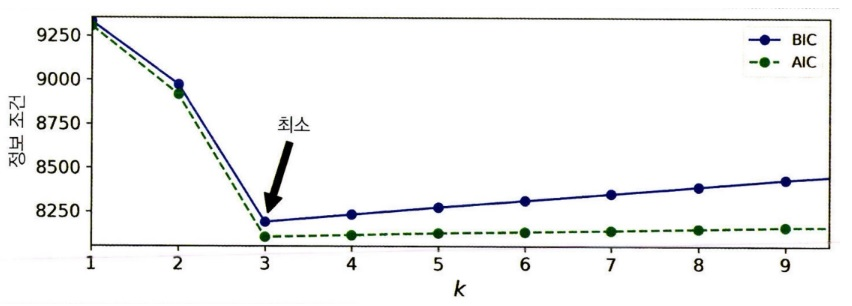
- 다음 그림은 여러 가지 클러스터 개수 k에 대한 BIC와 AIC를 보여준다.
- k=3일 때 BIC와 AIC가 모두 가장 작으므로, k=3이 최선의 선택으로 보인다.
 

In [ ]:
gm.bic(X)

2759.8740431585356

In [ ]:
gm.aic(X)

2676.4422034158392

### 2-3. 베이즈 가우시안 혼합 모델
- 최적의 클러스터 개수를 수동으로 찾지 않고 불필요한 클러스터의 가중치를 0으로 만드는 **`BayesianGaussianMixture`** 클래스를 사용할 수 있다.
- 클러스터 개수 **`n_components`**를 최적의 클러스터 개수보다 크다고 믿을 만한 값으로 지정한다. 이 알고리즘은 자동으로 불필요한 클러스터를 제거한다.
- 예를 들어 클러스터 개수를 10으로 설정하고 결과를 확인해보면, 알고리즘이 자동으로 8개의 클러스터가 필요하다는 것을 감지했다.
- 이 모델에서 클러스터 파라미터(가중치, 평균, 공분산 행렬 등)는 더이상 고정된 모델 파라미터가 아니라 클러스터 할당처럼 잠재 확률 변수로 취급된다.

In [ ]:
from sklearn.mixture import BayesianGaussianMixture
bgm = BayesianGaussianMixture(n_components=10, n_init=10)
bgm.fit(X)
np.round(bgm.weights_, 2)

array([0.17, 0.13, 0.13, 0.13, 0.14, 0.12, 0.1 , 0.  , 0.08, 0.  ])

### 2-3. 베이즈 가우시안 혼합 모델
- **베타 분포**는 **고정 범위 안에 놓인 값을 가진 확률 변수를 모델링**할 때 자주 사용된다. 이 경우 범위는 0에서 1이다.
- 예를 들어 SBP를 설명하기 위해 $𝚽$=[0.3, 0.6, 0.5, ...]라고 가정한다. 샘플의 30%가 클러스터 0에 할당되고, 남은 샘플의 60%가 클러스터 1에 할당된다. 그다음 남은 샘플의 50%가 클러스터 2에 할당되는 것이다.
- 이 프로세스는 새로운 샘플이 작은 클러스터보다 큰 클러스터에 합류할 가능성이 높은 데이터셋에 잘 맞는 모델이다.
- 농도 $𝜶$가 크면 $𝚽$값이 0에 가깝게 되고 SBP는 많은 클러스터를 만들고, 반대로 농도가 낮으면 $𝚽$값이 1에 가깝게 되고 몇 개의 클러스터만 만들어진다.
- 마지막으로 위샤트 분포를 사용하여 공분산 행렬을 샘플링한다.

### 2-3. 베이즈 가우시안 혼합 모델
- **잠재 변수 $𝐳$에 대한 사전 지식**이 **사전 확률(prior)이라는 확률 분포 $p(𝐳)$**에 인코딩될 수 있다.
- 예를 들어 클러스터가 적을 것(낮은 농도)이라는 사전 믿음을 가질 수 있다. 반대로 클러스터가 많을 것(높은 농도)이라고 믿을 수 있다.
- 이런 클러스터 개수에 대한 사전 믿음은 **`weight_concentration_prior`** 매개변수를 사용해 조정할 수 있다.
---
- **베이즈 정리**는 데이터 $𝐗$를 관측하고 난 후 **잠재 변수에 대한 확률 분포를 업데이트**하는 방법이다. 이는 **$𝐗$가 주어졌을 때 $𝐳$의 조건부 확률**인 **사후 확률(posterior) 분포 $p(𝐳|𝐗)$**를 계산한다.
- 베이즈 정리: $p(𝐳|𝐗)$ = 사후 확률 = (가능도x사전확률)/증거 = $\frac{p(𝐗|𝐳)p(𝐳)}{p(𝐗)}$
- 그러나 분모인 $p(𝐗)$를 계산하기 힘든데, 모든 클러스터 파라미터와 클러스터 할당의 조합을 고려하여 가능한 모든 𝐳값에 대해 적분해야 하기 때문이다.

### 2-4. 이상치 탐지와 특이치 탐지를 위한 다른 알고리즘
- 사이킷런에는 이상치 탐지와 특이치 탐지 전용으로 사용할 수 있는 몇가지 알고리즘이 구현되어 있다.
- **`PCA`**(그리고 `inverse_transform( )` 메서드를 가진 다른 차원 축소 기법)
 - **보통 샘플의 재구성 오차와 이상치의 재구성 오차를 비교**하면 일반적으로 **후자가 훨씬 크다**. 
 - 이는 간단하고 종종 매우 효과적인 이상치 탐지 기법이다.
- **`Fast-MCD`**
 -  `EllipticEnvelope` 클래스에서 구현된 이 알고리즘은 이상치 감지에 유용하다. 특히 데이터셋을 정제할 때 사용된다. 
 - 보통 샘플이 혼합된 것이 아니라 **하나의 가우시안 분포에서 생성되었다고 가정**한다. 또한 이 **가우시안 분포에서 생성되지 않은 이성치로 이 데이터셋이 오염되었다고 가정**한다.
 - 알고리즘이 **가우시안 분포의 파라미터를 추정할 때 이상치로 의심되는 샘플을 무시**한다. 이런 기법은 알고리즘이 타원형을 잘 추정하고 이상치를 잘 구분하도록 돕는다.
- **`Isolation Forest`**
 - 특히 **고차원 데이터셋에서 이상치 감지**를 위한 효율적인 알고리즘이다.
 - 이 알고리즘은 **무작위로 성장한 결정 트리로 구성된 랜덤 포레스트**를 만든다.
 - 각 노드에서 특성을 랜덤하게 선택한 다음 **최솟값과 최댓값 사이에서 랜덤한 임계값을 골라 데이터셋을 둘로 나눈다**. 이런 식으로 데이터셋은 점차 분리되어 모든 샘플이 다른 샘플과 격리될 때까지 진행된다.
 - 이상치는 일반적으로 다른 샘플과 멀리 떨어져 있으므로 모든 결정 트리에 걸쳐 평균적으로 정상 샘플과 적은 단계에서 격리된다.
- **`LOF(Local Outlier Factor)`**
 - 이 알고리즘도 **이상치 탐지**에 좋다.
 - **주어진 샘플 주위의 밀도와 이웃 주위의 밀도를 비교**한다.
 - 이상치는 종종 k개의 최근접 이웃보다 더 격리된다.
- **`one-class SVM`**
 - 이 알고리즘은 **특이치 탐지**에 잘 맞는다.
 - 커널 SVM 분류기가 두 클래스를 분리하는 방법에서 착안한다. 모든 샘플을 고차원 공간에 매핑한 다음, 이 고차원 공간에서 선형 SVM 분류기를 사용하여 두 클래스를 분리한다.
 - 여기서는 샘플의 클래스가 하나이기 때문에 대신 one-class SVM 알고리즘이 **원본 공간으로부터 고차원 공간에 있는 샘플을 분리**한다.
 - **원본 공간에서는 모든 샘플을 둘러싼 작은 영역을 찾는 것**이다. 새로운 샘플이 이 영역 안에 놓이지 않는다면 이는 **이상치**이다.
 - 조정할 하이퍼파라미터가 적다. 커널 SVM을 위한 하이퍼파라미터 하나와 마진 하이퍼파라미터가 있다. 마진은 실제 정상인 새로운 샘플을 실수로 이상치로 판단할 확률이다.
 - 이 알고리즘은 특히 고차원 데이터셋에 잘 작동한다. 하지만 모든 SVM과 마찬가지로 대규모 데이터셋으로의 확장은 어렵다.